# Loan Prediction: classification problem set  
## Model: Random Forest Classification
Test score: 0.77  
Analysis: Important feature selection  
Fine tuning: GridSearchCV    
  
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#

## 1) Download libraries and files

In [493]:
#importing all the packages that we might be using
%matplotlib inline
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer


In [495]:
#first lets download the file to python

train = pd.read_csv("train_loan.csv")
test = pd.read_csv("test_loan.csv")

print(test.shape)
print(train.shape)

(367, 12)
(614, 13)


## 2) Data exploration
First few steps I always look at:  
  
1) Dataframe shape  
2) NAN or missing value, outliers  
3) df.describe, spread of the data  

In [501]:
# 1) understand the size of the output
print(test.shape)
print(train.shape)

(367, 12)
(614, 13)


In [504]:
# 2) just a loop throught to see if the columns have weird data, outliers

for col in train.columns:
    counts= train[col].value_counts(dropna=False)
    print(counts) 

LP002757    1
LP001882    1
LP002547    1
LP001758    1
LP001112    1
           ..
LP002348    1
LP002888    1
LP001814    1
LP001673    1
LP001947    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
NaN        13
Name: Gender, dtype: int64
Yes    398
No     213
NaN      3
Name: Married, dtype: int64
0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
NaN      22
120.0    20
110.0    17
100.0    15
160.0    12
         ..
360.0     1
53.0

In [509]:
# 2)check for NAN
train.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [510]:
# 2.2) great, theres NAN, so we need to explore them further
# this draw out some of the rows with nan
train[train.isna().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [500]:
# tells me the spread of the data
train.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002757,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


## 1) Data preprocessing

In [ ]:
# get all the column names
colnames= train.columns
colnames

In [460]:
# prepping for the test submission (extra) later
results=test.Loan_ID
results= pd.DataFrame(results)

In [461]:
# drop nominal data, loan_ID

results=test.Loan_ID
train = train.drop(columns="Loan_ID")
test = test.drop(columns="Loan_ID")


In [464]:
# split data set to test and train, feature selection (X,y)
train_X = train.drop('Loan_Status',axis=1)
train_y = train.Loan_Status


In [465]:
#epreprocessing: encode y 
le = preprocessing.LabelEncoder()
train_y = le.fit_transform(train_y)


In [466]:
# replace NAN, for train, for this exercise i will change column by column

train_X["Gender"] = train_X["Gender"].replace(np.nan, "Male")
train_X["Married"] = train_X["Married"].replace(np.nan, "Yes")
train_X["Dependents"] = train_X["Dependents"].replace(np.nan, "0")
train_X["Education"] = train_X["Education"].replace(np.nan, "Graduate")
train_X["Self_Employed"] = train_X["Self_Employed"].replace(np.nan, "No")
train_X["ApplicantIncome"] = train_X["ApplicantIncome"].replace(np.nan, 5403)
train_X["CoapplicantIncome"] = train_X["CoapplicantIncome"].replace(np.nan, 1621)
train_X["LoanAmount"] = train_X["LoanAmount"].replace(np.nan, 146)
train_X["Loan_Amount_Term"] = train_X["Loan_Amount_Term"].replace(np.nan, 360)
train_X["Credit_History"] = train_X["Credit_History"].replace(np.nan, 1)
train_X["Property_Area"] = train_X["Property_Area"].replace(np.nan, "Semiurban")


In [467]:
# using column transformer to standardscaler(continuous), onehotencoding(categorical) 

train_continuous_cols = train_X.select_dtypes(include=["int64","float64"]).columns.tolist()
train_categorical_cols = train_X.select_dtypes(include=["object"]).columns.tolist()


preprocess = make_column_transformer( 
    (StandardScaler(),train_continuous_cols),
    (OneHotEncoder(), train_categorical_cols)
)
train_X= preprocess.fit_transform(train_X)

In [468]:
# get column names of all data

col_names = train_continuous_cols + preprocess.transformers_[1][1].get_feature_names(train_categorical_cols).tolist()

## 1) Train- test split

In [473]:
# Now that we are ready with X and y, 
# splitting the dataset for 70% Training and  30% test set using scikit model selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y,test_size = 0.3, random_state = 1)

In [474]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(429, 20)
(185, 20)
(429,)
(185,)


## 1) Random forest classification model
The random forest model uses random sampling and bagging (bootstrap aggregation) to reduce correlation between the trees and increase diversification.

In addition, it outputs simple feature selection which is useful to "explain" the model to non-data science stakeholders

In [475]:
#random forest clasification 
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0, bootstrap =True, max_depth= 80,
                            max_features = "auto", min_samples_leaf= 3, min_samples_split =12)
rf.fit(X_train, y_train)

print("Random Forest Model Score" , ":" , rf.score(X_train, y_train) , "," ,
      "Test Score" ,":" , rf.score(X_test, y_test))

Random Forest Model Score : 0.8344988344988346 , Test Score : 0.7891891891891892


## 1) Analysis: Feature importance
This step is to find out what is the most important feature that determines loan classification. This could be useful as a second level of data processing, or explaining the key features to stakeholders.

In [476]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = col_names,
                                   columns=['importance']).sort_values('importance',
                                    ascending=True)

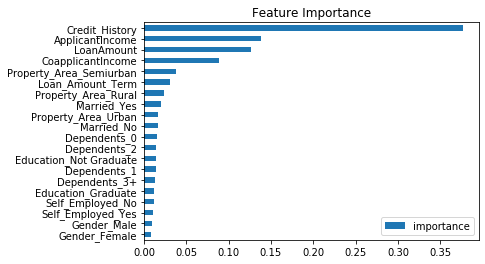

In [477]:
feature_importances.plot(kind="barh", title="Feature Importance")

## 1) Model Improvement: GridSearch 

In [478]:
# grid search

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3, 'auto', 'sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(train_X, train_y)



Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 12.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy', max_depth=80,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=3,
                                              min_samples_split=12,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'boot

In [479]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

## Extra: Fitting test data against rf model, for Analytics Vidhya submission

This is to fit in additional data and test it against the analytics vidhya database.  
Test score: 0.77

In [480]:
# preprocessing test dataset

test["Gender"] = test["Gender"].replace(np.nan, "Male")
test["Married"] = test["Married"].replace(np.nan, "Yes")
test["Dependents"] = test["Dependents"].replace(np.nan, "0")
test["Education"] = test["Education"].replace(np.nan, "Graduate")
test["Self_Employed"] = test["Self_Employed"].replace(np.nan, "No")
test["ApplicantIncome"] = test["ApplicantIncome"].replace(np.nan, 5403)
test["CoapplicantIncome"] = test["CoapplicantIncome"].replace(np.nan, 1621)
test["LoanAmount"] = test["LoanAmount"].replace(np.nan, 146)
test["Loan_Amount_Term"] = test["Loan_Amount_Term"].replace(np.nan, 360)
test["Credit_History"] = test["Credit_History"].replace(np.nan, 1)
test["Property_Area"] = test["Property_Area"].replace(np.nan, "Semiurban")

In [484]:
# fit test into random forest model
test= preprocess.fit_transform(test)

In [491]:
# predict and save as output file

y_pred = rf.predict(test)
results = pd.DataFrame(results)
results["Loan_Status"] = le.inverse_transform(y_pred)
results.to_csv("loan_results1.csv", index = False)